In [0]:
#importing the keras library to make the convolution network for fashion mnist dataset
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#loading the dataset and splitting it into trtaining and test data
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [0]:
#reshaping the data 
#-1 means this value is inferred from the length and remaining dimensions
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

In [0]:
#normalizing the data by diving it by 255(max value of rgb)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [0]:
#converting the image into one hot vector 
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [0]:
#making the sequential model
#model has two convolutional layers followed by two max pooling layers and then dropout and two fully connected layers
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 68s 1ms/step - loss: 0.5720 - acc: 0.7884 - val_loss: 0.4281 - val_acc: 0.8485
Epoch 2/5
60000/60000 [==============================] - 91s 2ms/step - loss: 0.4016 - acc: 0.8559 - val_loss: 0.3663 - val_acc: 0.8676
Epoch 3/5
60000/60000 [==============================] - 112s 2ms/step - loss: 0.3552 - acc: 0.8705 - val_loss: 0.3424 - val_acc: 0.8755
Epoch 4/5
60000/60000 [==============================] - 135s 2ms/step - loss: 0.3321 - acc: 0.8784 - val_loss: 0.3209 - val_acc: 0.8839
Epoch 5/5
60000/60000 [==============================] - 76s 1ms/step - loss: 0.3164 - acc: 0.8862 - val_loss: 0.3143 - val_acc: 0.8853


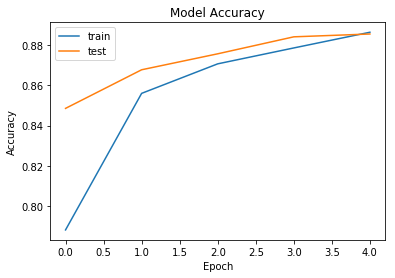

In [14]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',
              metrics=['accuracy']) #rmsmprop is used as optimisation function as it lies in realm of adaptive learning rate 

history = model.fit(train_X, train_Y_one_hot,batch_size=128,epochs=5,verbose=1,validation_data=(test_X, test_Y_one_hot)) #model fitting is done 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_5 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)         

In [16]:
score = model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.31433706345558166
Test accuracy: 0.8853
